In [4]:
!date

Thu Jun 30 16:38:30 UTC 2022


In [7]:
#genes = ['CHRM1', 'CHRM2', 'CHRM3', 'CYP2C9', 'CYP2D6', 'CYP3A4', 'HRH1', 'KCNH2', 'PIK3CG'] #PIK3CG - model file name problem
target = 'CYP2D6'

In [ ]:
! pip install rdkit-pypi
! pip install --pre deepchem
! pip install umap
! pip install llvmlite==0.35.0  --ignore-installed
! pip install umap-learn
! pip install molvs
! pip install bravado

In [ ]:
import deepchem as dc
dc.__version__
# get the Install AMPL_GPU_test.sh
! wget 'https://raw.githubusercontent.com/ATOMScience-org/AMPL/master/atomsci/ddm/examples/tutorials/config/install_AMPL_GPU_test.sh' >& /dev/null

# run the script to install AMPL
! chmod u+x install_AMPL_GPU_test.sh
! ./install_AMPL_GPU_test.sh

In [10]:
# mount your google drive where input files are located 
# this will ask you for permission to access your google drive. go ahed and allow 
from google.colab import drive
drive.mount('/content/gdrive')

# view contents of google drive 
%ls /content/gdrive/MyDrive/MoDaC/NCI_DOE_Archive/ATOM/safety_screening/Safety_Screen_Targets/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
CHRM1-ampl-1.1.0/
CHRM1-ampl-1.1.0.tar.gz
chrm1_union_trainset_graphconv_ampl-1.1.0.tar.gz
CHRM2-ampl-1.1.0.tar.gz
chrm2_union_trainset_graphconv_ampl-1.1.0.tar.gz
CHRM3-ampl-1.1.0.tar.gz
chrm3_union_trainset_graphconv_ampl-1.1.0.tar.gz
CYP2C9-ampl-1.1.0/
CYP2C9-ampl-1.1.0.tar.gz
cyp2c9_union_trainset_graphconv_ampl-1.1.0.tar.gz
CYP2D6-ampl-1.1.0/
CYP2D6-ampl-1.1.0.tar.gz
cyp2d6_union_trainset_graphconv_ampl-1.1.0.tar.gz
CYP3A4-ampl-1.1.0.tar.gz
cyp3a4_union_trainset_graphconv_ampl-1.1.0.tar.gz
HRH1-ampl-1.1.0.tar.gz
hrh1_union_trainset_graphconv_ampl-1.1.0.tar.gz
KCNH2-ampl-1.1.0.tar.gz
kcnh2_union_trainset_graphconv_ampl-1.1.0.tar.gz
Outputs_TrainModels_swapDatasets_AMPL-1.4.0_FRCE/
PIK3CG-ampl-1.1.0.tar.gz
pik3cg_union_trainset_graphconv_ampl-1.1.0.tar.gz
sst-ampl-1.1.0-README..rtf
sst_union_trainset_graphconv_ampl-1.1.0.README.rtf


In [13]:
#root_dir = '/home/sarkart4/MoDaC/NCI_DOE_Archive/ATOM/Safety_Screen_Targets/'
#home_dir = root_dir + gene.upper() + '-ampl-1.1.0/'

root_dir = '/content/gdrive/MyDrive/MoDaC/NCI_DOE_Archive/ATOM/safety_screening/Safety_Screen_Targets/'
home_dir = root_dir + target.upper() + '-ampl-1.1.0/'
!ls $home_dir

B9FDFB00
CHEMBL25-CYP2D6_human_IC50_26Nov2019.txt
cyp2d6_chembl_testset_base_smiles_union.csv
cyp2d6_dtc_smiles.csv
cyp2d6_dtc_testset_base_smiles_union.csv
cyp2d6_excape_smiles.csv
cyp2d6_excape_testset_base_smiles_union.csv
cyp2d6_union_testset_base_smiles.csv
cyp2d6_union_trainset_base_smiles.csv
cyp2d6_union_trainset_base_smiles_train_valid_test_scaffold_f2a8eff6-71b7-4139-882a-ef83b157b27f.csv
CYP3A4-ampl-1.1.0
scaled_descriptors


In [14]:
# manipulate data
import pandas as pd

# plot data
import numpy as np
import matplotlib.pyplot as plt

# curate data
import atomsci.ddm.utils.struct_utils as struct_utils
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.diversity_plots as dp

# visualize compound structures
import tempfile
from rdkit import Chem
from rdkit.Chem import Draw
from itertools import islice
from IPython.display import Image, display

# visualize data
import seaborn as sns
sns.set_context('poster')
import matplotlib_venn as mpv
from scipy.stats import pearsonr

# set up visualization parameters
sns.set_context("poster")
sns.set_style("whitegrid")
sns.set_palette("Set2")
pal = sns.color_palette()
plt.rcParams['figure.figsize'] = [10,10]

pd.set_option('display.max_columns',(90))
pd.set_option('display.max_rows',(20))
print("Imports Done.")

Imports Done.


## Reading files for each Target 

In [17]:
chembl_test_df = pd.read_csv(home_dir + target.lower() + '_chembl_testset_base_smiles_union.csv')
chembl_test = chembl_test_df['base_rdkit_smiles'].apply(curate_data.base_smiles_from_smiles).to_list()
print(len(chembl_test), len(set(chembl_test)))
#chembl_test_df.head(2)

722 722


In [18]:
# chrm1
dtc_df = pd.read_csv(home_dir + target.lower() + '_dtc_smiles.csv')
dtc = dtc_df['rdkit_smiles'].apply(curate_data.base_smiles_from_smiles).to_list()

#chrm2
#dtc_df = pd.read_csv(home_dir + gene.lower() + '_dtc_base_smiles_all.csv')
#dtc = dtc_df['base_rdkit_smiles'].apply(curate_data.base_smiles_from_smiles).to_list()

print(len(dtc), len(set(dtc)))
#dtc_df.head(2)

3834 3444


In [19]:
dtc_test_df = pd.read_csv(home_dir + target.lower() + '_dtc_testset_base_smiles_union.csv')
dtc_test = dtc_test_df['base_rdkit_smiles'].apply(curate_data.base_smiles_from_smiles).to_list()
print(len(dtc_test), len(set(dtc_test)))
#dtc_test_df.head(2)

404 404


In [20]:
excape_df = pd.read_csv(home_dir + target.lower() + '_excape_smiles.csv')
excape = excape_df['rdkit_smiles'].apply(curate_data.base_smiles_from_smiles).to_list()
print(len(excape), len(set(excape)))
#excape_df.head(2)

7961 7894


In [21]:
#CHRM3 does not have excape_test
excape_test_df = pd.read_csv(home_dir + target.lower() + '_excape_testset_base_smiles_union.csv')
excape_test = excape_test_df['base_rdkit_smiles'].apply(curate_data.base_smiles_from_smiles).to_list()
print(len(excape_test), len(set(excape_test)))
#excape_test_df.head(2)

1191 1191


In [22]:
union_train_df = pd.read_csv(home_dir + target.lower() + '_union_trainset_base_smiles.csv')
union_train = union_train_df['base_rdkit_smiles'].to_list()
print(len(union_train), len(set(union_train)))
#union_train_df.head(2)

10445 10445


In [23]:
union_test_df = pd.read_csv(home_dir + target.lower() + '_union_testset_base_smiles.csv')
union_test = union_test_df['base_rdkit_smiles'].to_list()
print(len(union_test), len(set(union_test)))
#union_test_df.head(2)

1843 1843


In [24]:
# intersection = set(union_train).intersection(set(dtc), set(excape), set(chembl))
# print(len(intersection))
intersection = set(union_test).intersection(set(chembl_test))
print("\nunion_test AND chembl_test=", len(intersection), "\tunion_test=", len(set(union_test)), "\tchembl_test=", len(set(chembl_test)))

intersection = set(union_test).intersection(set(dtc))
print("\nunion_test AND dtc=", len(intersection), "\tunion_test=", len(set(union_test)), "\tdtc=", len(set(dtc)))
intersection = set(union_test).intersection(set(dtc_test))
print("union_test AND dtc_test=", len(intersection),"\tunion_test=", len(set(union_test)), "\tdtc_test=", len(set(dtc_test)))


intersection = set(union_test).intersection(set(excape))
print("\nunion_test AND excape=", len(intersection), "\tunion_test=", len(set(union_test)), "\texcape=", len(set(excape)))
intersection = set(union_test).intersection(set(excape_test))
print("union_test AND excape_test=", len(intersection), "\tunion_test=", len(set(union_test)), "\texcape_test=", len(set(excape_test)))


union_test AND chembl_test= 129 	union_test= 1843 	chembl_test= 722

union_test AND dtc= 404 	union_test= 1843 	dtc= 3444
union_test AND dtc_test= 50 	union_test= 1843 	dtc_test= 404

union_test AND excape= 1166 	union_test= 1843 	excape= 7894
union_test AND excape_test= 169 	union_test= 1843 	excape_test= 1191


In [25]:
# check if 30% of dtc and dtc_test are same or not 
#excape_test = list(set(union_test).intersection(set(excape)))
print("dtc=", len(set(dtc)), "\t30%=",np.floor(len(set(dtc))*.30), "\tdtc_test=", len(set(dtc_test)))
print("excape=", len(set(excape)), "\t30%=",np.floor(len(set(excape))*.30), "\texcape_test=", len(set(excape_test)))

#once we take away dtc_test, check if rest of dtc forms union_train
rest_dtc = set(dtc)-set(dtc_test)
intersection = set(union_train).intersection(set(dtc))
print("\nunion_train AND dtc=", len(intersection),"\trest_dtc=", len(set(rest_dtc)))
rest_excape = set(excape)-set(excape_test)
intersection = set(union_train).intersection(set(excape))
print("union_train AND excape=", len(intersection),"\trest_excape=", len(set(rest_excape)))

print("\nunion_test=", len(set(union_test)),"\t(chembl_test+dtc_test+excape_test)=", len(set(chembl_test))+len(set(dtc_test))+len(set(excape_test)))
print("union_train=", len(set(union_train)),"\t(rest_dtc+rest_excape)=", len(set(rest_dtc))+len(set(rest_excape)))

dtc= 3444 	30%= 1033.0 	dtc_test= 404
excape= 7894 	30%= 2368.0 	excape_test= 1191

union_train AND dtc= 3039 	rest_dtc= 3040
union_train AND excape= 6725 	rest_excape= 6703

union_test= 1843 	(chembl_test+dtc_test+excape_test)= 2317
union_train= 10445 	(rest_dtc+rest_excape)= 9743


In [26]:
print("dtc ", len(set(dtc)), len(set(dtc_test)), len(set(dtc)-set(dtc_test)))
print("excape ", len(set(excape)), len(set(excape_test)), len(set(excape)-set(excape_test)))
#print("chembl ", len(set(excape)), len(set(chembl_test)), len(set(union_test)-chembl_test)))

dtc  3444 404 3040
excape  7894 1191 6703


## Plot Tanimoto similarity distributions on all pairs of molecules 

In [33]:
from atomsci.ddm.pipeline import dist_metrics as dm
from atomsci.ddm.pipeline import chem_diversity as cd

#union_train_dfX = union_train_df
#union_train_dfX['X']=union_train_df['base_rdkit_smiles']

tani_dists_union_train = cd.calc_dist_smiles(feat_type='ECFP', dist_met='tanimoto', smiles_arr1=union_train_df['base_rdkit_smiles'])
# dists = cd.calc_dist_diskdataset(feat_type='ECFP', 
#                                  dist_met='tanimoto', 
#                                  dataset1=union_train_dfX)
# calc_dist_feat_array(feat_type='ecfp', 
#                      dist_met='tanimoto', 
#                      feat1='all',
#                      calc_type='nearest', 
#                      num_nearest=1)
tani_dists_union_train
#dm.tanimoto(fps1, fps2=None)
#dm.mcs(mols1, mols2=None)

array([0.22535211, 0.64150943, 0.        , ..., 0.        , 0.55769231,
       0.        ])

In [83]:
type(tani_dists_union_train)

numpy.ndarray

In [36]:
tani_dists_union_test = cd.calc_dist_smiles(feat_type='ECFP', dist_met='tanimoto', smiles_arr1=union_test_df['base_rdkit_smiles'])
tani_dists_union_test.shape

(1843,)

In [106]:
tani_dists_between_train_test = cd.calc_dist_smiles(feat_type='ECFP', dist_met='tanimoto', smiles_arr1=union_train_df['base_rdkit_smiles'], smiles_arr2=union_test_df['base_rdkit_smiles'])
tani_dists_between_train_test.shape

(10445,)

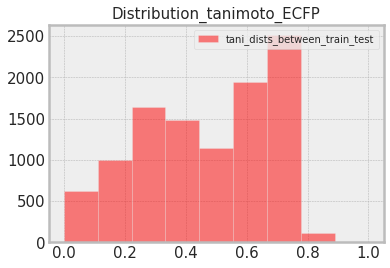

In [115]:
#plot tanimoto distribution
fig, ax = plt.subplots(figsize = (6,4))
fontsize=15
#plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=fontsize)     # fontsize of the axes title
plt.rc('xtick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('ytick', labelsize=fontsize)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
bins = np.linspace(0, 1, 10)
#plt.hist(tani_dists_union_train, bins, alpha=0.5, label='tani_dists_union_train', color='c')
#plt.hist(tani_dists_union_test, bins, alpha=0.5, label='tani_dists_union_test', color='b')
plt.hist(tani_dists_between_train_test, bins, alpha=0.5, label='tani_dists_between_train_test', color='r')
plt.legend(loc='upper right', prop={'size': 10})
plt.title('Distribution_tanimoto_ECFP')
plt.show()

In [91]:
union_train_df.pIC50.min(), union_train_df.pIC50.max()

(1.4431143483494877, 10.0)

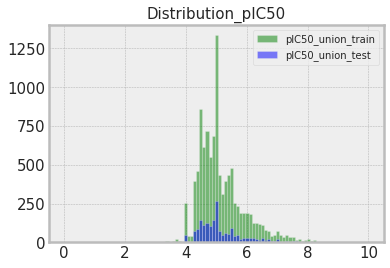

In [98]:
#plot pIC50 distribution
import matplotlib.pyplot as mp
fig, ax = plt.subplots(figsize = (6,4))
fontsize=15
plt.rc('axes', titlesize=fontsize)     # fontsize of the axes title
plt.rc('xtick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('ytick', labelsize=fontsize)    # fontsize of the tick labels
bins = np.linspace(0, 10, 100)
plt.hist(union_train_df['pIC50'].to_numpy(), bins, alpha=0.5, label='pIC50_union_train', color='g')
plt.hist(union_test_df['pIC50'].to_numpy(), bins, alpha=0.5, label='pIC50_union_test', color='b')
plt.legend(loc='upper right', prop={'size': 10})
plt.title('Distribution_pIC50')
plt.show()

In [ ]:
from collections import Counter
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt

def draw_venn3(a,b,c, labels):
    A = set(a)
    B = set(b)
    C = set(c)
    
    AB_overlap = A & B  #compute intersection of set A & set B
    AC_overlap = A & C
    BC_overlap = B & C
    ABC_overlap = A & B & C
    A_rest = A - AB_overlap - AC_overlap #see left graphic
    B_rest = B - AB_overlap - BC_overlap
    C_rest = C - AC_overlap - BC_overlap
    AB_only = AB_overlap - ABC_overlap   #see right graphic
    AC_only = AC_overlap - ABC_overlap
    BC_only = BC_overlap - ABC_overlap
    
    sets = Counter()               #set order A, B, C   
    sets['100'] = len(A_rest)      #100 denotes A on, B off, C off 
    sets['010'] = len(B_rest)      #010 denotes A off, B on, C off
    sets['001'] = len(C_rest)      #001 denotes A off, B off, C on 
    sets['110'] = len(AB_only)     #110 denotes A on, B on, C off
    sets['101'] = len(AC_only)     #101 denotes A on, B off, C on 
    sets['011'] = len(BC_only)     #011 denotes A off, B on, C on 
    sets['111'] = len(ABC_overlap) #011 denotes A on, B on, C on
    labels = labels 
    plt.figure(figsize=(7,7)) 
    ax = plt.gca() 
    venn3(subsets=sets, set_labels=labels, ax=ax,set_colors=('darkviolet','deepskyblue','blue'),alpha=0.7)
    #venn3(subsets=sets, set_labels=labels, ax=ax,set_colors=('red','green','blue'),alpha=0.7);  
    plt.title(gene)
    plt.show()


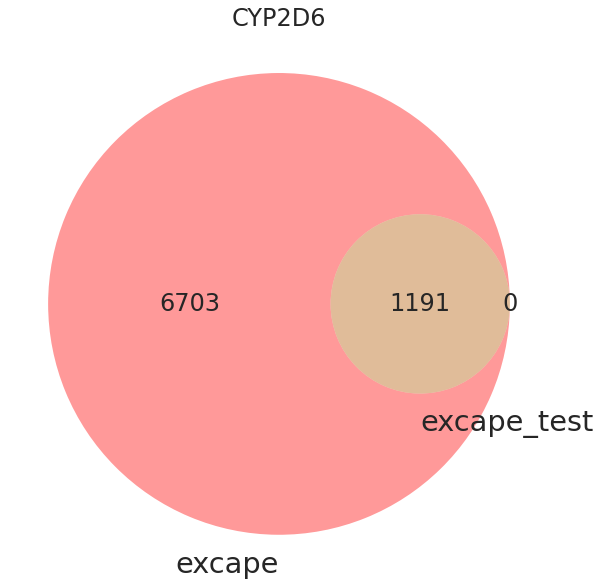

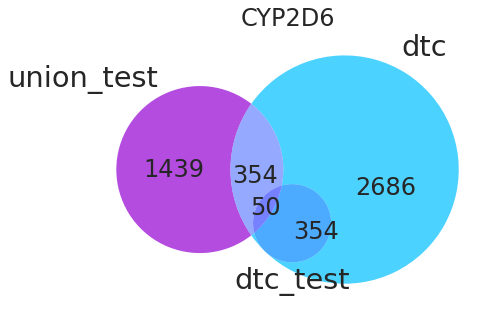

In [ ]:
#venn2([set(dtc),set(dtc_test)], ('dtc', 'dtc_test'));
venn2([set(excape),set(excape_test)], ('excape', 'excape_test'));
plt.title(gene)
draw_venn3(union_test, dtc, dtc_test, ('union_test', 'dtc','dtc_test'));

In [ ]:
# Plot venn2 distribution 
dlst = [set(union_train),set(union_test)]
fig = plt.figure();
venn2(dlst, ('union_train', 'union_test'))
plt.title(gene)
fig.savefig(root_dir + 'Plots/'+gene+'_union_venn.png')

NameError: name 'venn2' is not defined

<Figure size 720x720 with 0 Axes>

1899 1899
335 335
1493 1493
264 264
1754 1754
310 310
11321 11321
1998 1998
10445 10445
1843 1843
17796 17796
3141 3141
1077 1077
189 189
11920 11920
2103 2103
2611 2611
428 428


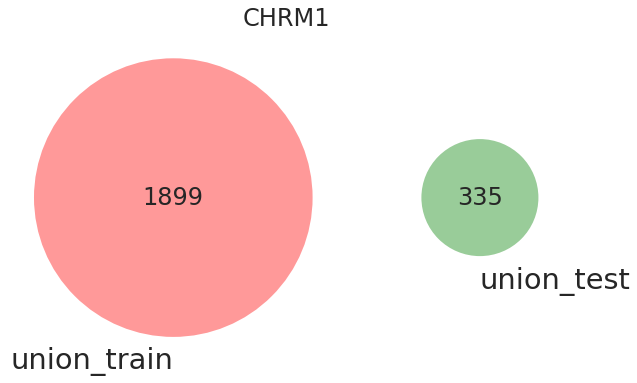

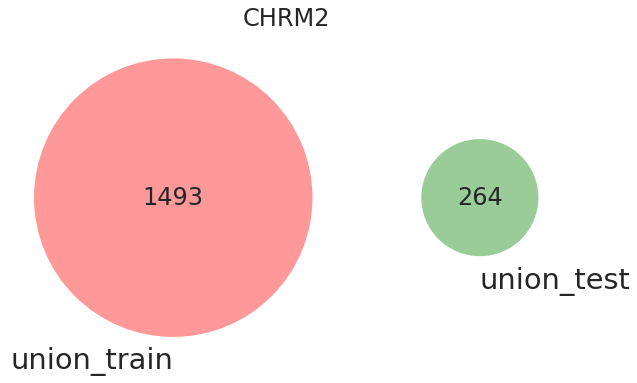

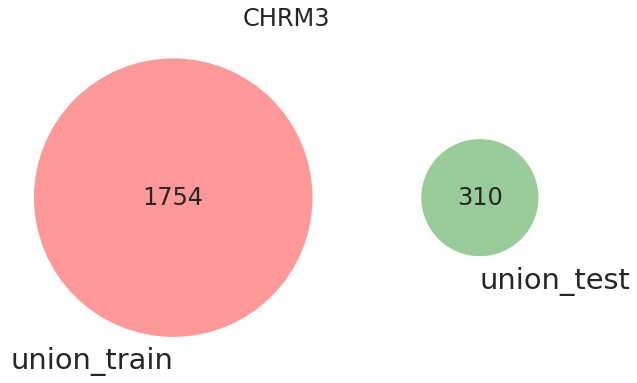

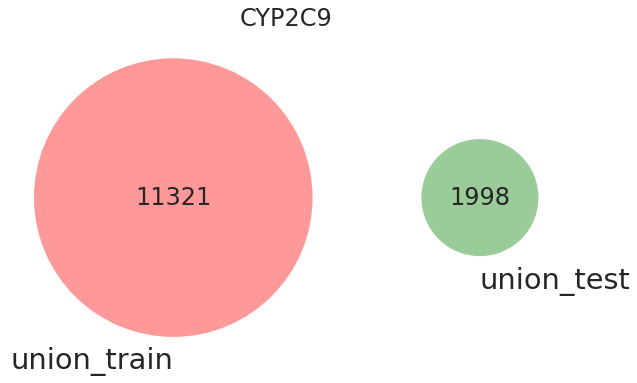

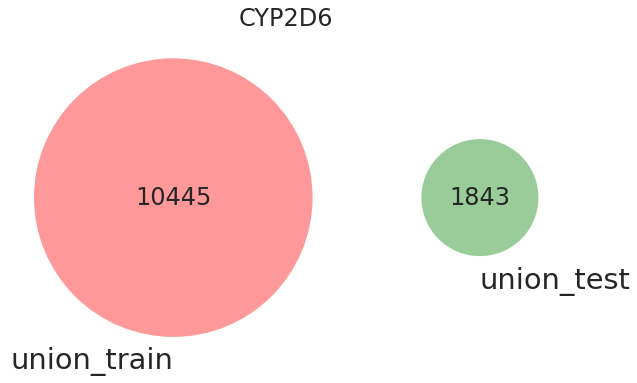

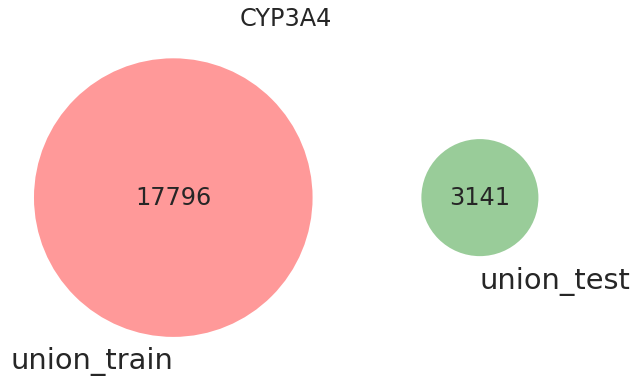

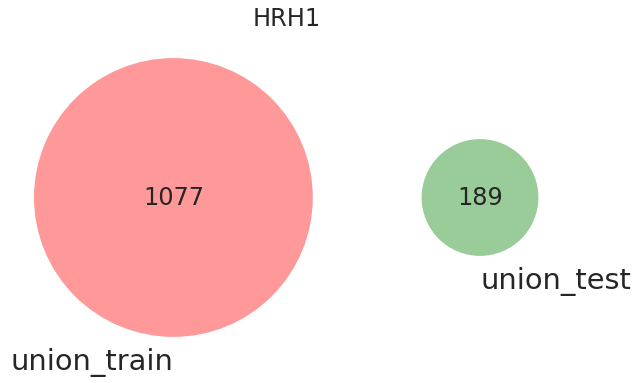

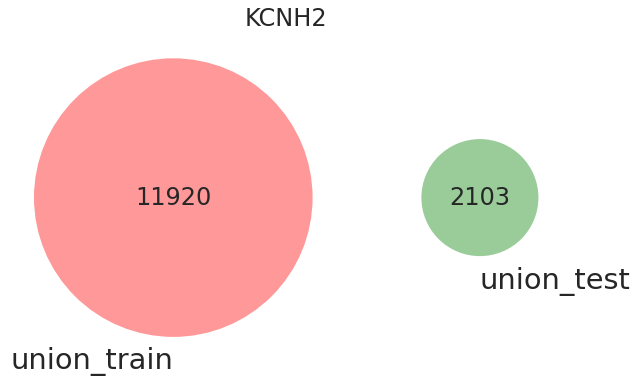

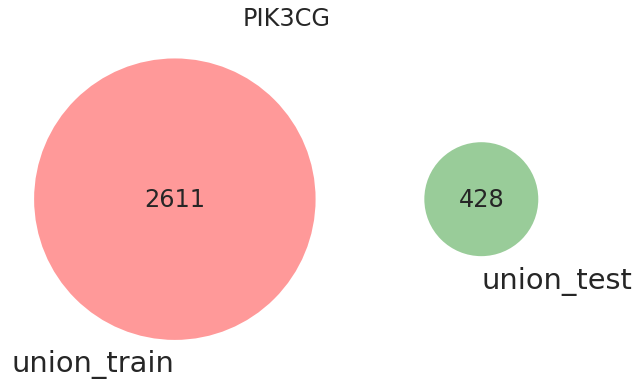

In [ ]:
root_dir = '/home/sarkart4/MoDaC/NCI_DOE_Archive/ATOM/Safety_Screen_Targets/'

genes = ['CHRM1', 'CHRM2', 'CHRM3', 'CYP2C9', 'CYP2D6', 'CYP3A4', 'HRH1', 'KCNH2', 'PIK3CG'] #PIK3CG - model file name problem
#gene = 'CYP2C9'
for gene in genes:
    home_dir = root_dir + gene.upper() + '-ampl-1.1.0/'
    
    union_train_df = pd.read_csv(home_dir + gene.lower() + '_union_trainset_base_smiles.csv')
    union_train = union_train_df['base_rdkit_smiles'].to_list()
    print(len(union_train), len(set(union_train)))

    union_test_df = pd.read_csv(home_dir + gene.lower() + '_union_testset_base_smiles.csv')
    union_test = union_test_df['base_rdkit_smiles'].to_list()
    print(len(union_test), len(set(union_test)))
    
    # Plot venn2 distribution 
    dlst = [set(union_train),set(union_test)]
    fig = plt.figure()
    venn2(dlst, ('union_train', 'union_test'))
    plt.title(gene)
    fig.savefig(root_dir + 'Plots/'+gene+'_union_venn.png')

In [ ]:
#genes = ['CHRM1', 'CHRM2', 'CHRM3', 'CYP2C9', 'CYP2D6', 'CYP3A4', 'HRH1', 'KCNH2', 'PIK3CG'] #PIK3CG - model file name problem
gene = 'PIK3CG'

2611 2611
428 428
Post-processing dataset

Total Number of results = 2611
dataset mean = 6.1260728585897395 NM
dataset stdev = 1.1090619298036313 NM
dataset max = 9.221849166410903 NM
dataset min = 2.0382467858132167 NM



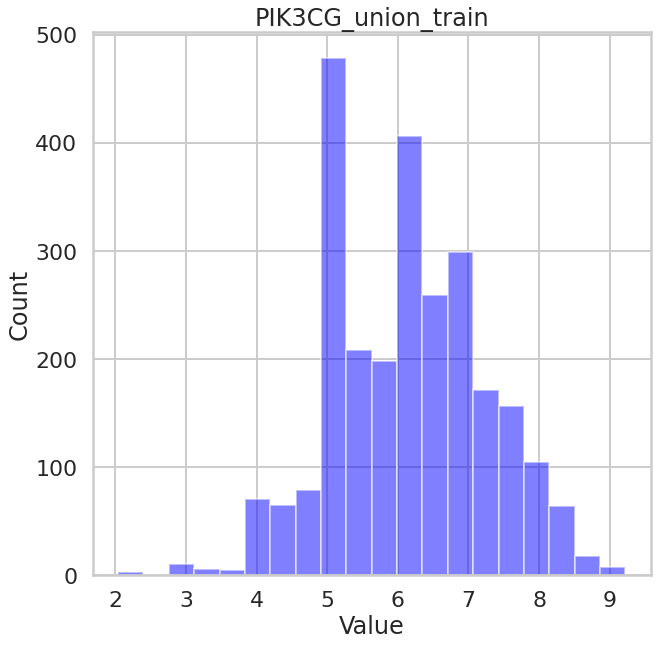

Post-processing dataset

Total Number of results = 428
dataset mean = 6.278982563870937 NM
dataset stdev = 1.2139520233059586 NM
dataset max = 9.95468 NM
dataset min = 2.1347183150043896 NM



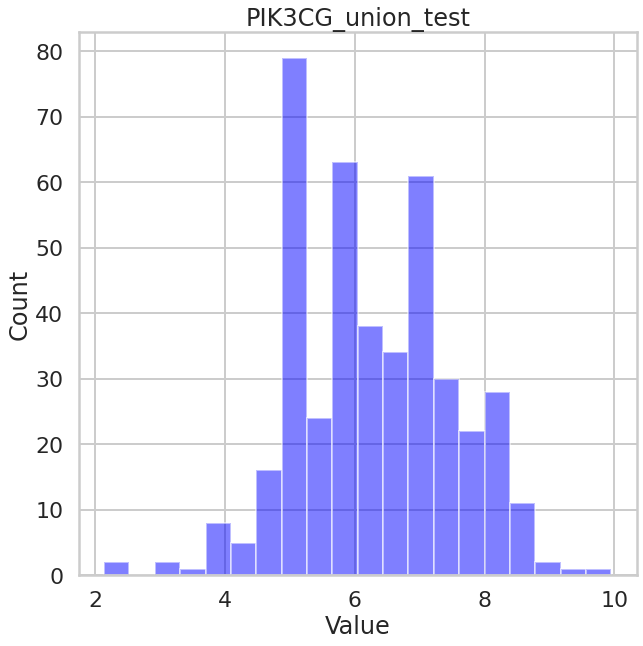

In [ ]:
root_dir = '/home/sarkart4/MoDaC/NCI_DOE_Archive/ATOM/Safety_Screen_Targets/'
home_dir = root_dir + gene.upper() + '-ampl-1.1.0/'

union_train_df = pd.read_csv(home_dir + gene.lower() + '_union_trainset_base_smiles.csv')
union_train = union_train_df['base_rdkit_smiles'].to_list()
print(len(union_train), len(set(union_train)))

union_test_df = pd.read_csv(home_dir + gene.lower() + '_union_testset_base_smiles.csv')
union_test = union_test_df['base_rdkit_smiles'].to_list()
print(len(union_test), len(set(union_test)))

column = 'pIC50'
num_bins = 20
units = 'NM'
filepath = ''

# Using the summarize_data submodule, we are going to compile a set of data summarization tools to calculate several descriptive features
# These features include: column, num_bins, title, units, filepath, and data
curate_data.summarize_data(column, num_bins, gene+'_union_train', units, filepath, union_train_df)
#fig.savefig(root_dir+'Plots/'+ title+'_union_train_summarize.png')
curate_data.summarize_data(column, num_bins, gene+'_union_test', units, filepath, union_test_df)
#fig.savefig(root_dir+'Plots/'+ title+'_union_test_summarize.png')

Computing fingerprints...
Done
Computing Tanimoto distance matrix...
Done


/home/sarkart4/miniconda3/envs/ampl-1.4.0/lib/python3.7/site-packages/umap/umap_.py:1504: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  "using precomputed metric; transform will be unavailable for new data and inverse_transform "
/home/sarkart4/miniconda3/envs/ampl-1.4.0/lib/python3.7/site-packages/atomsci/ddm/pipeline/diversity_plots.py:340: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  tani_linkage = linkage(tani_dist, method='complete')


Computing fingerprints...
Done
Computing Tanimoto distance matrix...
Done


/home/sarkart4/miniconda3/envs/ampl-1.4.0/lib/python3.7/site-packages/umap/umap_.py:1504: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  "using precomputed metric; transform will be unavailable for new data and inverse_transform "
/home/sarkart4/miniconda3/envs/ampl-1.4.0/lib/python3.7/site-packages/atomsci/ddm/pipeline/diversity_plots.py:340: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  tani_linkage = linkage(tani_dist, method='complete')


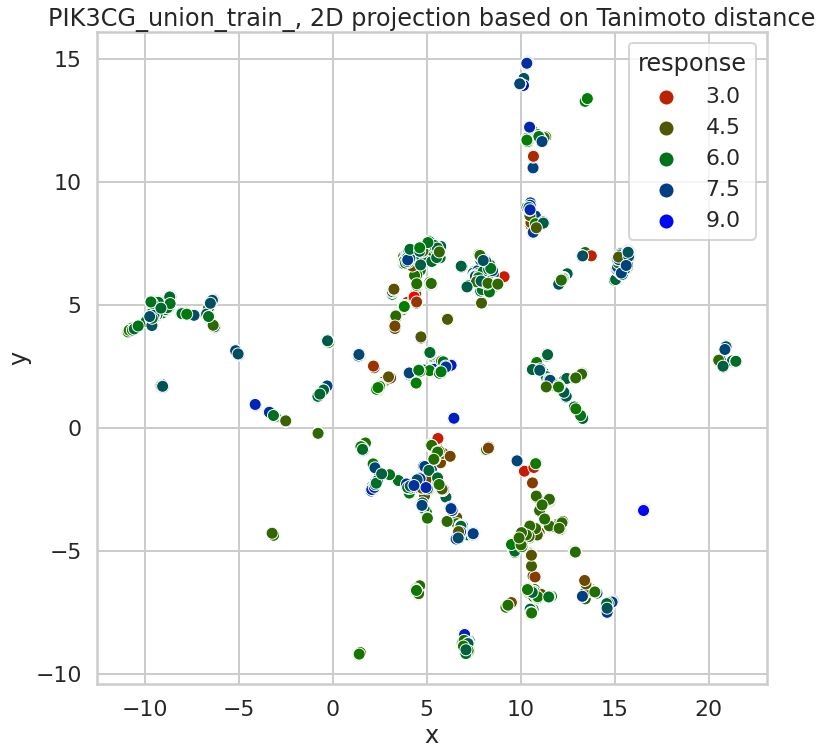

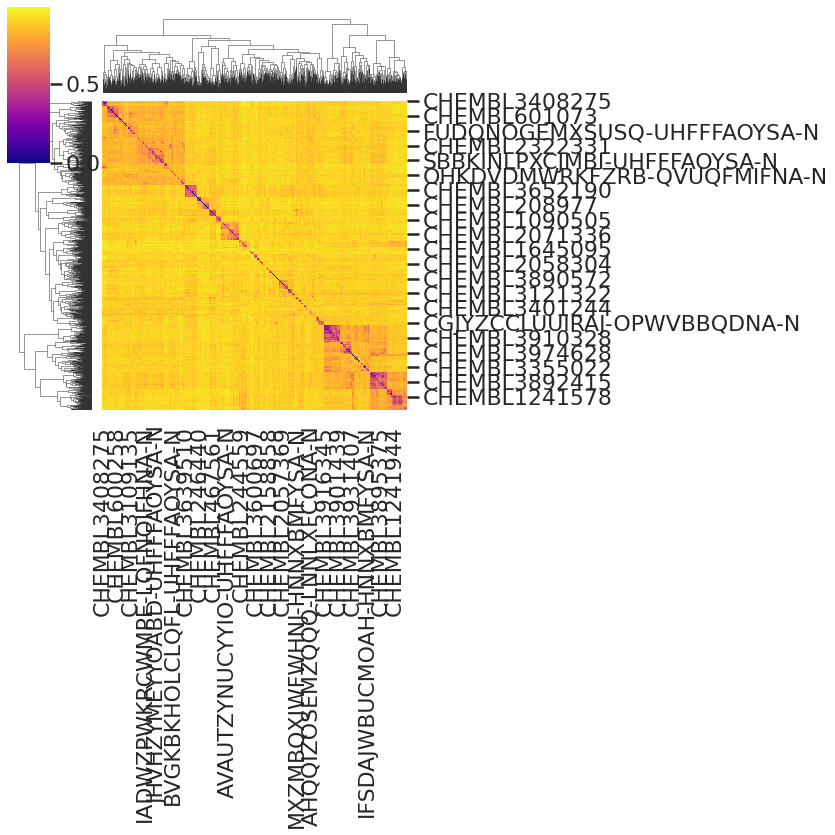

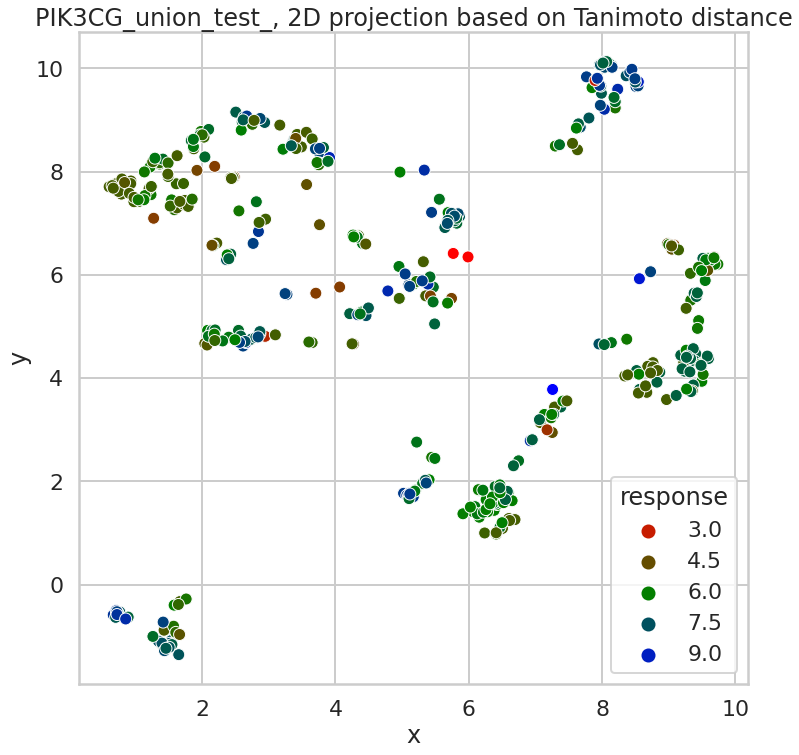

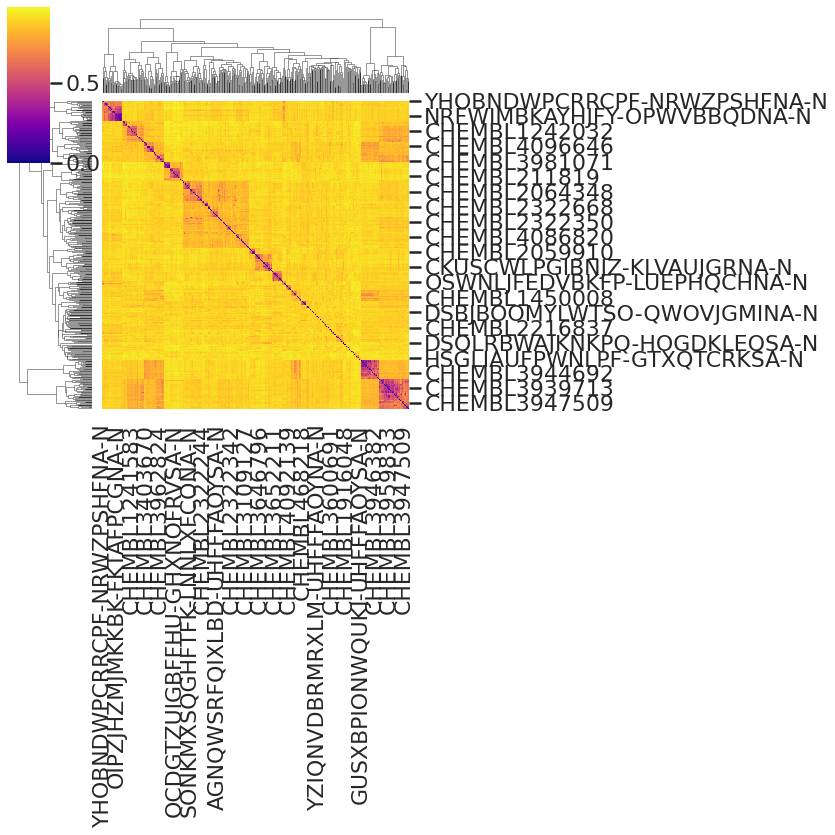

In [ ]:
#gene = 'CHRM2'
root_dir = '/home/sarkart4/MoDaC/NCI_DOE_Archive/ATOM/Safety_Screen_Targets/'
home_dir = root_dir + gene.upper() + '-ampl-1.1.0/'

dset_key = home_dir + gene.lower() + '_union_trainset_base_smiles.csv'
dp.diversity_plots(dset_key = dset_key, 
                   datastore = False, 
                   response_col = 'pIC50',
                   max_for_mcs = 100, 
                   title_prefix = gene+'_union_train_',
                   #out_dir = root_dir+'Plots/',
                   id_col = 'compound_id',
                   smiles_col = 'base_rdkit_smiles',
                   is_base_smiles = True)

dset_key = home_dir + gene.lower() + '_union_testset_base_smiles.csv'
dp.diversity_plots(dset_key = dset_key, 
                   datastore = False, 
                   response_col = 'pIC50',
                   max_for_mcs = 100, 
                   title_prefix = gene+'_union_test_',
                   #out_dir = root_dir+'Plots/',
                   id_col = 'compound_id',
                   smiles_col = 'base_rdkit_smiles',
                   is_base_smiles = True)